In [1]:
#from IPython.display import Image
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)
#https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

4.1.1


In [2]:
mouse_x = 0
mouse_y = 0
def click_and_crop(event, x, y, flags, param):
    global mouse_x,mouse_y
    if event == cv2.EVENT_LBUTTONUP:
        mouse_x = x
        mouse_y = y
        print('mouseClick',x,y)
    

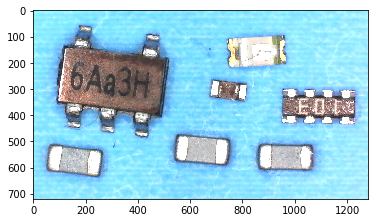

In [3]:
dispW=1280
dispH=720
cam0=cv2.VideoCapture('/dev/video1')
cam0.set(cv2.CAP_PROP_FRAME_WIDTH,dispW)
cam0.set(cv2.CAP_PROP_FRAME_HEIGHT,dispH)

# read a single image and position the windows
ret, frame0 = cam0.read()
cv2.imshow('nanoCam',frame0)
cv2.moveWindow('nanoCam',10,40)
cv2.setMouseCallback("nanoCam", click_and_crop)

# hier passiet nicht ganz soviel
canny_thrs1 = 20
canny_thrs2 = 200

# need od values; small is better 
gauss_v1 = 3
gauss_v2 = 3
plt.imshow(frame0)
plt.show()

In [4]:
def __draw_label(img, text, pos, bg_color):
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    scale = 1.2
    color = (0, 0, 0)
    thickness = cv2.FILLED
    margin = 2
    txt_size = cv2.getTextSize(text, font_face, scale, thickness)
    end_x = pos[0] + txt_size[0][0] + margin
    end_y = pos[1] - txt_size[0][1] - margin
    cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness)
    cv2.putText(img, text, pos, font_face, scale, color, 1, cv2.LINE_AA)

# https://www.geeksforgeeks.org/check-whether-given-point-lies-inside-rectangle-not/
# A utility function to calculate  
# area of triangle formed by (x1, y1),  
# (x2, y2) and (x3, y3) 
def area(x1, y1, x2, y2, x3, y3): 
      
    return abs((x1 * (y2 - y3) + 
                x2 * (y3 - y1) + 
                x3 * (y1 - y2)) / 2.0) 
# A function to check whether point  
# P(x, y) lies inside the rectangle  
# formed by A(x1, y1), B(x2, y2),  
# C(x3, y3) and D(x4, y4)  
def check(x1, y1, x2, y2, x3, y3, x4, y4, 
          x, y): 
    # Calculate area of rectangle ABCD  
    A = (area(x1, y1, x2, y2, x3, y3) +
         area(x1, y1, x4, y4, x3, y3)) 
    # Calculate area of triangle PAB  
    A1 = area(x, y, x1, y1, x2, y2) 
    # Calculate area of triangle PBC  
    A2 = area(x, y, x2, y2, x3, y3) 
    # Calculate area of triangle PCD  
    A3 = area(x, y, x3, y3, x4, y4) 
    # Calculate area of triangle PAD  
    A4 = area(x, y, x1, y1, x4, y4); 
    # Check if sum of A1, A2, A3  
    # and A4 is same as A  
    return (A == A1 + A2 + A3 + A4) 

def checkbox(x,y,w,h,px,py):
    return check(x,y, x+w,y, x+w,y+h, x,y+h ,px, py)

In [5]:
# from here: https://www.murtazahassan.com/learn-opencv-in-3-hours-chapter-6/
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

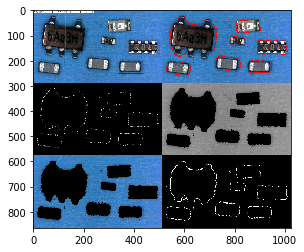

In [ ]:
kernel = np.ones((2,2),np.uint8)

def empty(a):
    pass

cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",640,240)
cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",19,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",110,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",240,255,empty)
cv2.createTrackbar("Val Min","TrackBars",153,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)


while True:
    ret, frame0 = cam0.read()
    
    # color ajust
    imgHSV = cv2.cvtColor(frame0,cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")    
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(frame0,frame0,mask=mask)
    

    gray2 = cv2.cvtColor(imgResult, cv2.COLOR_BGR2GRAY) 
    gray = cv2.GaussianBlur(gray2,(gauss_v1,gauss_v2),cv2.BORDER_DEFAULT)
    
    edged = cv2.Canny(gray, canny_thrs1, canny_thrs2) 
    
 
    imgDilation = cv2.dilate(edged, kernel, iterations = 3)    
    imgEroded = cv2.erode(imgDilation, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(imgEroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    # cv2.imshow('Canny Edges After Contouring', edged) 

    cnt_rects = 0
    cnt_rects2 = 0
    boxes = []
    
    imgContour = frame0.copy()    
    
    for contour in contours:
        myarea = cv2.contourArea(contour)
        if myarea>500:
            cv2.drawContours(imgContour, contour, -1, (255, 0, 0), 3)
        
        (x,y,w,h) = cv2.boundingRect(contour)
        if(w > 50 and w <500 and h < w * 0.6 and h > w * 0.4  ):
            boxes.append([x, y, w, h])
            cnt_rects+=1
        else:
            cnt_rects2+=1
            
    # cv2.imshow('Canny Edges After Contouring', edged) 

    
    for box in boxes:
        top_left     = (box[0], box[1])
        bottom_right = (box[0] + box[2], box[1] + box[3])
        subcounter=0
        for subset in contours:
            (x2,y2,w2,h2) = cv2.boundingRect(subset)
            if(checkbox( box[0], box[1] , box[2] , box[2] , x2, y2 )):
                cv2.rectangle(frame0, (x2,y2), (x2+w2,y2+h2), (255,0,0), 1)
                subcounter+=1
        cv2.putText(frame0, str(subcounter) , top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 1, cv2.LINE_AA)
        if(subcounter > 3):
            cv2.rectangle(frame0, top_left, bottom_right, (0,255,0), 1)
        else:
            cv2.rectangle(frame0, top_left, bottom_right, (0,0,255), 1)
    
        # Mark CenterPoint as white Dot
        center_x = int(box[0] + (box[2] / 2))
        center_y = int(box[1] + (box[3] / 2))
        # print(center_x,center_y)
        cv2.rectangle(frame0, (center_x-1,center_y-1), (center_x+1,center_y+1), (255,255,255), 1)
        
    
    __draw_label(frame0, 'count 0402 parts ' + str(cnt_rects) + ' ' + str(cnt_rects2)
                 + ' ' + str(mouse_x)
                 + ' ' + str(mouse_y)
                 + ' ' + str(cnt_rects2), (2,30), (255,255,255))
    
    cv2.line(img=frame0, pt1=(0, 240),   pt2=(640, 240), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(320, 0),   pt2=(320, 480), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    # show marker
    cv2.line(img=frame0, pt1=(80,  230), pt2=(80,  250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(160, 230), pt2=(160, 250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(240, 230), pt2=(240, 250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(400, 230), pt2=(400, 250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(480, 230), pt2=(480, 250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(560, 230), pt2=(560, 250), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(310,  80), pt2=(330,    80), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(310,  160), pt2=(330,  160), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(310,  320), pt2=(330,  320), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    cv2.line(img=frame0, pt1=(310,  400), pt2=(330,  400), color=(0, 255, 255), thickness = 1, lineType = 8, shift = 0)
    
    
    imgstack = stackImages(0.4, ([frame0,imgContour],
                                 [edged,gray2],
                                 [imgResult,imgEroded]) )
    cv2.imshow('nanoCam',imgstack)
    
    
    mykey = cv2.waitKey(1)
    if(mykey == ord('q')): break
    if(mykey == ord('a')): canny_thrs1+=2 # gauss need odd values
    if(mykey == ord('s')): canny_thrs1-=2
    if(mykey == ord('d')): canny_thrs2+=2
    if(mykey == ord('f')): canny_thrs2-=2
    if(mykey == ord('p')):
        plt.imshow(imgstack)
        plt.show()
        
cam0.release()
cv2.destroyWindow('nanoCam')


In [ ]:
cv2.startWindowThread()